## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'kano'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2013100105044,"Can, Mustafa",Tett inntil dagene,2009
1,2010091408025,,Disney's Hiawatha og den store fisken,1997
2,2013092407195,"Malmgren, Ulf",blå tranen,1979
3,2015091506125,"Tranströmer, Tomas",Dikt og prosa i samling,2011
4,2014092208011,,Disney's En dag i Disneyland park,2002
5,2008101000020,"Warner, Alan",Jentekoret,2000
6,2009061604028,"Eschenburg, Kathleen",I regnbuens tegn,2003
7,2013102905001,"Sandel, Cora",Alberte-trilogien,2009
8,2013120306071,"De la Roche, Mazo",Rennys datter,1962
9,2016112148526,"Garroway, Pete",Det lukter svidd,1960


In [10]:
nb.urn_concordance(word='hvitvin', urns=korpus)

"Himmelblomsttreets muligheter, Nygårdshaug, Gert, 1996",å ha drukket en flaske,hvitvin,på en fortausrestaurant i Gamlebyen
"shopoholiker treffer blink, Kinsella, Sophie, 2006",rekker meg et glass iskald,hvitvin,. Jeg nipper til det
"Den som brenner får svi, Raaen, Brynjulv, 2001",etter det drikker vi avkjølt,hvitvin,som vi har hatt senket
"Den som brenner får svi, Raaen, Brynjulv, 2001",en veikro . Tante får,hvitvin,"og rekesmørbrød , og forteller"
"De fires tegn, Doyle, Arthur Conan, 1986",", samt en ganske utsøkt",hvitvin,". Watson , du har"
"Gjøre godt, Marstein, Trude, 2006",og klukkler mens han skjenker,hvitvin,i Kajas glass . Elise
"Gjøre godt, Marstein, Trude, 2006",et vinglass med en skvett,hvitvin,"i , en tallerken ,"
"Gjøre godt, Marstein, Trude, 2006",gikk til Parkkafeen og drakk,hvitvin,", flaske etter flaske ,"
"Gjøre godt, Marstein, Trude, 2006",kommer ut med brus og,hvitvin,. Hun ser stresset ut
"Gjøre godt, Marstein, Trude, 2006",oss på Parkkafeen og drikker,hvitvin,. Klokka er bare litt
"Paradiso, Lezama Lima, José, 2002",reiste seg og helte tørr,hvitvin,"over brettet , slik at"


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
en,763
.,621
",",511
i,456
og,348


In [15]:
large.head()

,0
.,1261
",",997
en,924
og,690
i,687


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
lånt,3,3,1.000000
toppen,3,3,1.000000
padler,6,6,1.000000
enkelt,4,4,1.000000
turer,4,4,1.000000
...,...,...,...
finne,8,13,0.615385
uten,8,13,0.615385
med,198,323,0.613003
ut,68,111,0.612613


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",511,997,0.512538
.,621,1261,0.492466
og,348,690,0.504348
!,24,50,0.480000
?,81,176,0.460227


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
uthult,11,12,0.916667
lage,9,10,0.900000
bunnen,8,9,0.888889
ligger,8,9,0.888889
fin,7,8,0.875000
veltet,6,7,0.857143
taket,6,7,0.857143
dra,11,13,0.846154
gled,10,12,0.833333
prøvde,5,6,0.833333


In [26]:
delta_const

,small,large,ratio
lånt,3,3,1.000000
toppen,3,3,1.000000
padler,6,6,1.000000
enkelt,4,4,1.000000
turer,4,4,1.000000
...,...,...,...
finne,8,13,0.615385
uten,8,13,0.615385
med,198,323,0.613003
ut,68,111,0.612613


In [27]:
delta_max.head(50).index

Index(['uthult', 'lage', 'bunnen', 'ligger', 'fin', 'veltet', 'taket', 'dra',
       'gled', 'prøvde', 'trenger', 'leie', 'trukket', 'kysten', 'padle', 'en',
       'stor', 'øyeblikk', 'lettere', 'din', 'ført', 'fraktet', 'smal', 'Ein',
       'unna', 'trakk', 'gjemt', 'tatt', 's', 'rodde', 'bygde', 'langsomt',
       'vinket', 'huset', 'hente', '"', 'ikkje', 'reist', 'indiansk', 'låstet',
       'lo', 'kjøpe', 'brygga', 'egen', 'ute', 'te', 'slags', 'gammel', 'sin',
       'lang'],
      dtype='object')

In [28]:
delta_const.head(50).index

Index(['lånt', 'toppen', 'padler', 'enkelt', 'turer', 'padleåre', 'hit',
       'følge', 'klissvåte', 'bundet', 'besøk', 'eide', 've', 'Skal',
       'kjenner', 'kjøpte', 'ny', 'di', 'eie', 'prøve', 'bark', 'Over', 'sig',
       'va', 'låne', 'nærmeste', 'Min', 'gutt', 'gult', 'lette', 'leid',
       'glidende', 'utfor', 'Mitt', 'stjele', 'fart', 'manøvrere', 'Då',
       'krat', 'uthulet', 'soldatene', 'nettopp', 'havs', 'mudrete', 'utpå',
       'mat', 'ovenfor', 'trengte', 'soldater', 'skutt'],
      dtype='object')

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

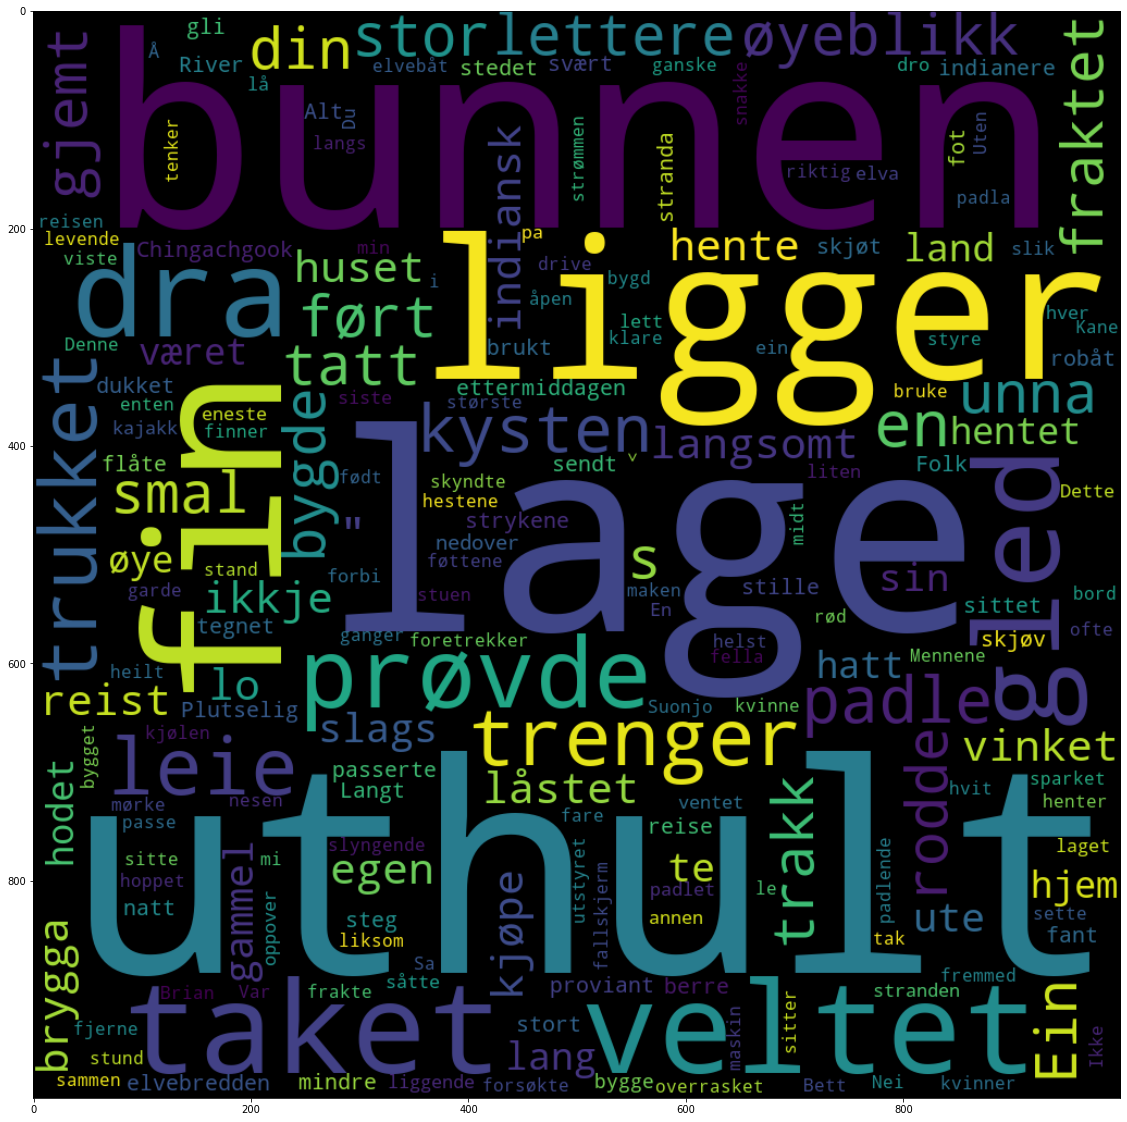

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

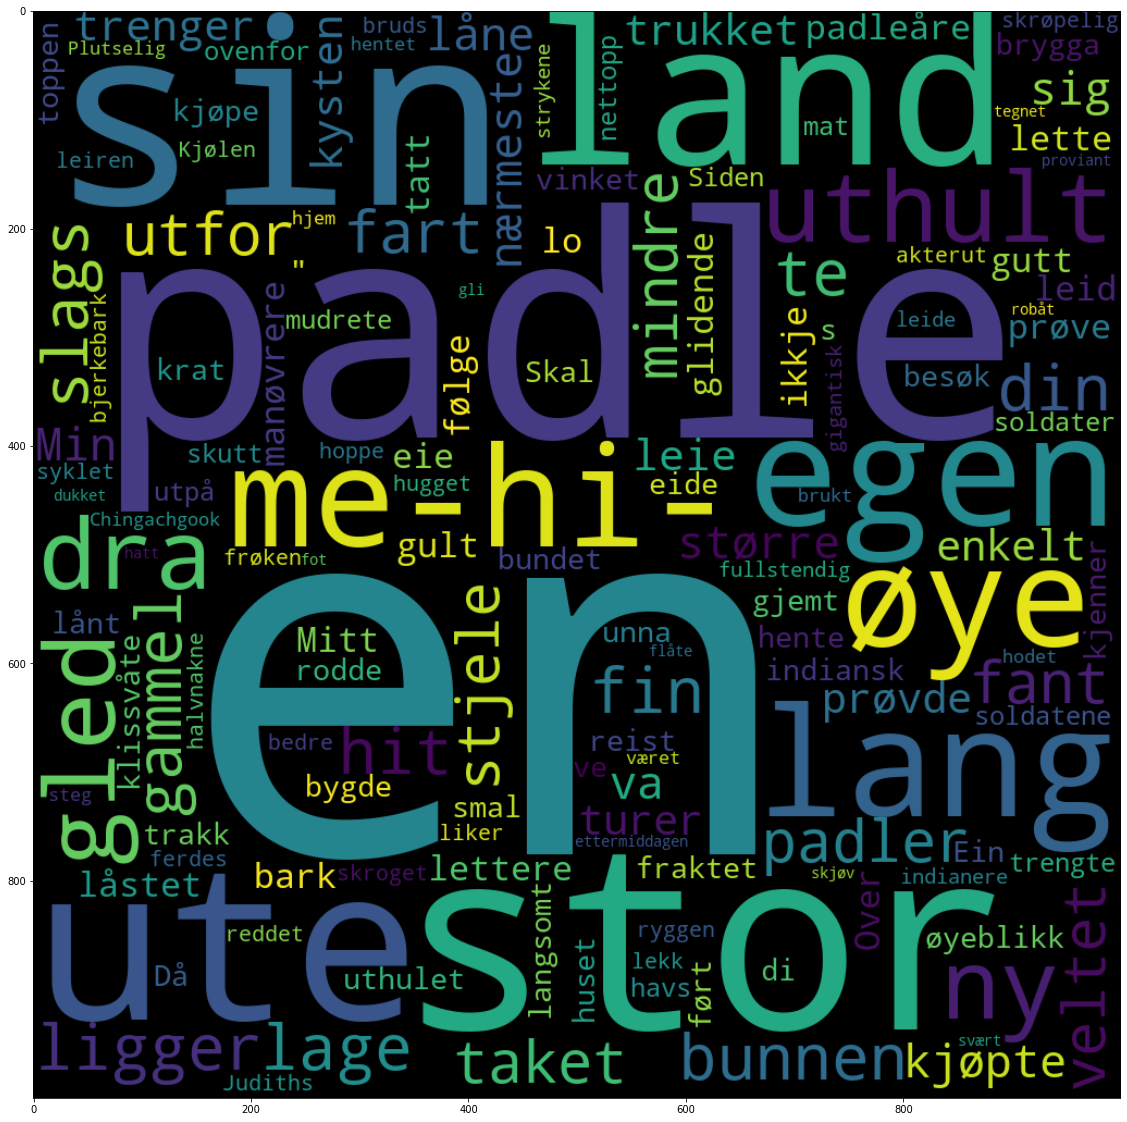

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))